In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import os

exec(open("../header.py").read())

Header initialized


In [26]:
raw_train_data_0 = pd.read_csv(processed_root("03-bag-of-words/threshold-40/bow_train_data.csv"))
raw_val_data_0 = pd.read_csv(processed_root("03-bag-of-words/threshold-40/bow_val_data.csv"))
raw_test_data_0 = pd.read_csv(processed_root("03-bag-of-words/threshold-40/bow_test_data.csv"))

In [4]:
raw_train_data = pd.read_csv(processed_root("04-bow-added-features/feat_train_data-40.csv"))
raw_val_data = pd.read_csv(processed_root("04-bow-added-features/feat_val_data-40.csv"))
raw_test_data = pd.read_csv(processed_root("04-bow-added-features/feat_test_data-40.csv"))

In [5]:
raw_train_data_0.columns

Index(['poetry_text', 'meet', 'high', 'among', 'splendour', 'wood', 'like',
       'grow', 'etern', 'hous',
       ...
       'anyth', 'buri', 'caus', 'seal', 'bless', 'loss', 'yon', 'bad', 'flow',
       'poetry_author'],
      dtype='object', length=944)

In [6]:
raw_train_data.columns

Index(['Unnamed: 0', 'poetry_text', 'sympathi', 'meet', 'high', 'among',
       'steep', 'splendour', 'wood', 'like',
       ...
       'meek', 'ash', 'pair', 'utmost', 'fierc', 'poetry_author',
       'ave_word_len', 'ave_line_len', 'num_syllables', 'num_rhymes'],
      dtype='object', length=1904)

In [7]:
raw_train_data['poem_id']

KeyError: 'poem_id'

In [8]:
print(len(raw_train_data_0.columns.values), len(raw_train_data.columns.values))

944 1904


In [9]:
raw_train_data['num_syllables']

0      7.447619
1      4.750000
2      8.800000
3      3.636364
4      5.500000
         ...   
452    4.615385
453    2.833333
454    6.124431
455    7.589862
456    5.222222
Name: num_syllables, Length: 457, dtype: float64

In [10]:
raw_train_data['num_rhymes']

0       0
1       0
2       8
3       0
4       0
       ..
452     0
453     0
454    71
455    62
456     2
Name: num_rhymes, Length: 457, dtype: int64

In [11]:
raw_train_data_0

,poetry_text,meet,high,among,splendour,wood,like,grow,etern,hous,...,anyth,buri,caus,seal,bless,loss,yon,bad,flow,poetry_author
0,—was this\nthat one fairest river lovd\nto ble...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,William Wordsworth
1,light low upon earth\nyou send flash sun\nher ...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Alfred, Lord Tennyson"
2,from\nromeo juliet spoken juliet\no romeo rome...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,William Shakespeare
3,glass street tinsel peril\ntre travel stood\nf...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Emily Dickinson
4,like best\nabout ourselves\n\nour inability\nt...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Rae Armantrout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,risest thou thus dim dawn again\nand howlest i...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Alfred, Lord Tennyson"
237,mean near\nor nearly\n\na book something\n\nor...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rae Armantrout
238,suffer allow\n\nlist want\n\nlistless transcen...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rae Armantrout
239,earth anyth show fair\ndul would soul could pa...,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,William Wordsworth


In [14]:
raw_train_data

,Unnamed: 0,poetry_text,sympathi,meet,high,among,steep,splendour,wood,like,...,meek,ash,pair,utmost,fierc,poetry_author,ave_word_len,ave_line_len,num_syllables,num_rhymes
0,0,—was this\nthat one fairest river lovd\nto ble...,1,1,1,1,1,1,1,1,...,0,0,0,0,0,William Wordsworth,4.903260,4.528571,7.447619,0
1,1,light low upon earth\nyou send flash sun\nher ...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,"Alfred, Lord Tennyson",4.204819,3.458333,4.750000,0
2,2,natur lay idiot taught thee love\nand sophistr...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,John Donne,4.822086,5.433333,8.800000,8
3,3,from\nromeo juliet spoken juliet\no romeo rome...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,William Shakespeare,4.539474,2.303030,3.636364,0
4,4,sometim someth like second\nwash base street\n...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,John Ashbery,4.763889,3.272727,5.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,452,blith newcom heard\ni hear thee rejoice\no cuc...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,William Wordsworth,4.416000,3.205128,4.615385,0
453,453,knew it\nwould happen\non laws\nand it\nwould ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Kay Ryan,4.280000,2.083333,2.833333,0
454,454,i\n\ni weep adonais—h dead\noh weep adonai tho...,0,0,1,1,0,1,1,1,...,0,1,1,0,1,Percy sshe Shelley,4.717187,4.034901,6.124431,71
455,455,excerpt\ni rode one even count maddalo\nupon b...,0,1,1,0,1,0,0,1,...,1,0,0,0,0,Percy sshe Shelley,4.656872,4.861751,7.589862,62


### Import

In [15]:
list(set(raw_train_data['poetry_author'].values))

['William Wordsworth',
 'Kay Ryan',
 'Emily Dickinson',
 'Rae Armantrout',
 'Yusef Komunyakaa',
 'John Donne',
 'Percy sshe Shelley',
 'Walt Whitman',
 'Alfred, Lord Tennyson',
 'John Ashbery',
 'William Shakespeare',
 'William Butler Yeats']

In [34]:
X_train = raw_train_data\
    .drop(['poetry_text', 'poetry_author', 'num_syllables', 'num_rhymes', 'ave_word_len', 'ave_line_len', 'Unnamed: 0'], axis = 1)
X_val = raw_val_data\
    .drop(['poetry_text', 'poetry_author', 'num_syllables', 'num_rhymes', 'ave_word_len', 'ave_line_len', 'Unnamed: 0'], axis = 1)
y_train = raw_train_data['poetry_author']
y_val = raw_val_data['poetry_author']

In [165]:
X_train = raw_train_data\
    .drop(['poetry_text', 'poetry_author', 'Unnamed: 0'], axis = 1)
X_val = raw_val_data\
    .drop(['poetry_text', 'poetry_author', 'Unnamed: 0'], axis = 1)
y_train = raw_train_data['poetry_author']
y_val = raw_val_data['poetry_author']

### Model

In [150]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB

In [154]:
nb = MultinomialNB()
# nb = GaussianNB()
# nb = CategoricalNB()

### Train

In [155]:
y_pred = nb.fit(X_train, y_train)

### Evaluate

In [159]:
# Training
y_pred_train = nb.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train) * 100
print("Training Accuracy: %.2f%%"%(train_accuracy))

# Validation
y_pred_val = nb.predict(X_val)
val_accuracy = np.mean(y_pred_val == y_val) * 100
print("Validation Accuracy: %.2f%%"%(val_accuracy))

Training Accuracy: 89.93%
Validation Accuracy: 62.20%


In [168]:
X_train.columns

Index(['sympathi', 'meet', 'high', 'among', 'steep', 'splendour', 'wood',
       'like', 'grow', 'etern',
       ...
       'vein', 'meek', 'ash', 'pair', 'utmost', 'fierc', 'ave_word_len',
       'ave_line_len', 'num_syllables', 'num_rhymes'],
      dtype='object', length=1901)

In [198]:
nb.coef_.shape

(12, 1901)

In [205]:
np.mean(nb.coef_[:, 1897:], axis=0)

array([-3.28758733, -3.46039433, -3.02478971, -4.99953976])

In [188]:
coeffs = np.round_(nb.coef_, 3)
max_coeffs = list(map(max, abs(coeffs)))

In [189]:
print(max_coeffs)

[9.008, 8.072, 8.455, 8.474, 7.805, 8.837, 7.943, 8.751, 8.272, 8.681, 8.819, 8.15]


In [197]:
for i, elem in enumerate(max_coeffs):
    print(len(np.where(abs(coeffs[i]) == elem)[0]))

480
1453
968
1019
1706
562
1545
471
1198
711
619
1303


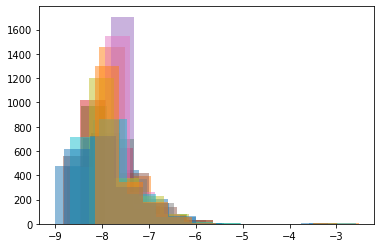

In [180]:
for coefs in nb.coef_:
    plt.hist(coefs, alpha=0.5)
plt.show()

### Weighted Accuracy

In [127]:
np.mean(raw_val_data[y_pred_val==y_val].groupby("poetry_author").count()["poetry_text"]/\
raw_val_data.groupby("poetry_author").count()["poetry_text"])

0.644229055258467

### Looking at misclassified poems

In [130]:
correct_poems = np.random.choice(raw_val_data[y_pred_val==y_val]["poetry_text"],3,replace=False)

In [131]:
for poem in correct_poems:
    print("poem \n", poem)

poem 
 late late late dark night chill
lat late late enter still
too late late ye cannot enter now

no light repent
and learn bridegroom relent
too late late ye cannot enter now

no light late dark chill night
o let u may find light
too late late ye cannot enter now

hav heard bridegroom sweet
o let u tho late kiss feet
no late ye cannot enter
poem 
 christma weave
th holli round christma hearth
th silent snow possessd earth
and calm fell christmaseve

th yulelog sparkl keen frost
no wing wind region swept
but thing brood slept
th quiet sens someth lost

a winter left behind
again ancient game place
th mimic pictur breath grace
and danc song hoodmanblind

who showd token distress
no singl tear mark pain
o sorrow sorrow wane
o grief grief chang less

o last regret regret die
noimixt mystic frame
h deep relat same
but long use tear dri
poem 
 low high doth dissolut climb
and sink high low along scale
of aw note whose concord shall fail
a music melancholi chime
which hear meddl crime
nor 

In [132]:
incorrect_poems = np.random.choice(raw_val_data[y_pred_val!=y_val]["poetry_text"],3,replace=False)

In [133]:
for poem in incorrect_poems:
    print("poem \n", poem)

poem 
 wild wild storm sea high running
steadi roar gale incess underton muttering
shout demoniac laughter fit pierc pealing
wav air midnight savagest triniti lashing
out shadow milkwhit comb careering
on beachi slush sand spirt snow fierc slanting
wher murk easter deathwind breasting
through cut swirl spray watch firm advancing
that distanc wreck red signal flaring

slush sand beach tireless till daylight wending
steadili slowli hoars roar never remitting
along midnight edg milkwhit comb careering
a group dim weird form struggl night confronting
that savag triniti warili watch
poem 
 world much u late soon
get spend lay wast powers—
littl see natur ours
w given heart away sordid boon
thi sea bare bosom moon
th wind howl hours
and upgath like sleep flowers
for everyth tune
it move u great god i'd rather be
a pagan suckl creed outworn
so might stand pleasant lea
hav glimps would make le forlorn
hav sight proteus rise sea
or hear old triton blow wreathèd horn
poem 
 hole have
almost left

In [60]:
raw_train_data[y_pred_train==y_train].groupby("poetry_author").count()["poetry_text"]

poetry_author
Alfred, Lord Tennyson    48
Emily Dickinson          39
John Ashbery             33
John Donne               29
Kay Ryan                 12
Percy sshe Shelley       25
Rae Armantrout           42
Walt Whitman             22
William Butler Yeats     32
William Shakespeare      60
William Wordsworth       38
Yusef Komunyakaa         31
Name: poetry_text, dtype: int64

In [58]:
raw_train_data.groupby("poetry_author").count()["poetry_text"]

poetry_author
Alfred, Lord Tennyson    55
Emily Dickinson          40
John Ashbery             33
John Donne               30
Kay Ryan                 29
Percy sshe Shelley       31
Rae Armantrout           44
Walt Whitman             29
William Butler Yeats     33
William Shakespeare      60
William Wordsworth       42
Yusef Komunyakaa         31
Name: poetry_text, dtype: int64

In [59]:
raw_train_data[y_pred_train==y_train].groupby("poetry_author").count()["poetry_text"]/raw_train_data.groupby("poetry_author").count()["poetry_text"]

poetry_author
Alfred, Lord Tennyson    0.872727
Emily Dickinson          0.975000
John Ashbery             1.000000
John Donne               0.966667
Kay Ryan                 0.413793
Percy sshe Shelley       0.806452
Rae Armantrout           0.954545
Walt Whitman             0.758621
William Butler Yeats     0.969697
William Shakespeare      1.000000
William Wordsworth       0.904762
Yusef Komunyakaa         1.000000
Name: poetry_text, dtype: float64

It classifies John Ashbery and William Shakespeare and Yusef Komunyakaa perfectly. The worst is Kay Ryan.

In [111]:
correct_pred_val = raw_val_data[y_pred_val==y_val]
correct_pred_train = raw_train_data[y_pred_train==y_train]

In [112]:
incorrect_pred_val = raw_val_data[y_pred_val!=y_val]
incorrect_pred_train = raw_train_data[y_pred_train!=y_train]

In [85]:
correct_pred_val.groupby("poetry_author").count()["poetry_text"]/\
raw_val_data.groupby("poetry_author").count()["poetry_text"]

poetry_author
Alfred, Lord Tennyson    0.562500
Emily Dickinson          0.833333
John Ashbery             0.666667
John Donne               0.750000
Kay Ryan                      NaN
Percy sshe Shelley       0.250000
Rae Armantrout           0.416667
Walt Whitman             0.375000
William Butler Yeats     0.600000
William Shakespeare      0.882353
William Wordsworth       0.750000
Yusef Komunyakaa         1.000000
Name: poetry_text, dtype: float64

In [89]:
list(set(correct_pred_val["poetry_author"]))

['William Wordsworth',
 'Emily Dickinson',
 'Rae Armantrout',
 'Yusef Komunyakaa',
 'John Donne',
 'Percy sshe Shelley',
 'Walt Whitman',
 'Alfred, Lord Tennyson',
 'John Ashbery',
 'William Shakespeare',
 'William Butler Yeats']

In [106]:
print(np.mean(list(map(len,correct_pred_val["poetry_text"]))))
print(np.std(list(map(len,correct_pred_val["poetry_text"]))))

951.0759493670886
1163.0843518084005


(array([43.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  94. ,  624.3, 1154.6, 1684.9, 2215.2, 2745.5, 3275.8, 3806.1,
        4336.4, 4866.7, 5397. ]),
 <a list of 10 Patch objects>)

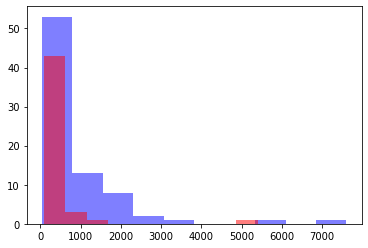

In [108]:
plt.hist(list(map(len,correct_pred_val["poetry_text"])), alpha=0.5, color='blue')
plt.hist(list(map(len,incorrect_pred_val["poetry_text"])), alpha=0.5, color= "red")

In [107]:
print(np.mean(list(map(len,incorrect_pred["poetry_text"]))))
print(np.std(list(map(len,incorrect_pred["poetry_text"]))))

452.875
758.5894153240386


In [116]:
print(np.mean(list(map(len,correct_pred_train["poetry_text"]))))
print(np.std(list(map(len,correct_pred_train["poetry_text"]))))

1320.8126520681265
3736.7697965416614


In [117]:
print(np.mean(list(map(len,incorrect_pred_train["poetry_text"]))))
print(np.std(list(map(len,incorrect_pred_train["poetry_text"]))))

244.54347826086956
103.56844124869463


In general it has a harder time with shorter poems

In [136]:
raw_train_data.groupby("poetry_author").count()["poetry_text"]

poetry_author
Alfred, Lord Tennyson    55
Emily Dickinson          40
John Ashbery             33
John Donne               30
Kay Ryan                 29
Percy sshe Shelley       31
Rae Armantrout           44
Walt Whitman             29
William Butler Yeats     33
William Shakespeare      60
William Wordsworth       42
Yusef Komunyakaa         31
Name: poetry_text, dtype: int64

In [141]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [142]:
author_labels = list(y_val.value_counts().index)

Text(32.99999999999999, 0.5, 'True')

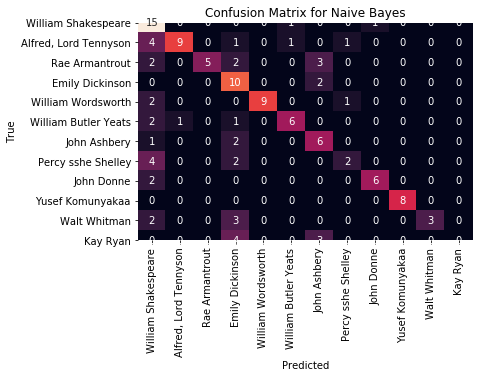

In [143]:
fig, ax = plt.subplots()

sn.heatmap(confusion_matrix(y_true = y_val, y_pred = y_pred_val, labels = author_labels), 
           annot = True,
           xticklabels = author_labels,
           yticklabels = author_labels,
           cbar = False,
           ax = ax)

ax.set_title("Confusion Matrix for Naive Bayes")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")